In [56]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d    
import math
%matplotlib inline

In [57]:
from tensorflow.examples.tutorials.mnist import input_data

In [81]:
epochs = 100_000
batches = 100
mnist = input_data.read_data_sets("MNIST_data/", one_hot = True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


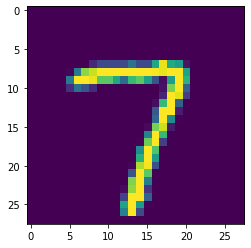

In [63]:
plt.imshow(mnist.train.images[100].reshape(28,28))

In [64]:
input_nodes = tf.placeholder(dtype = tf.float32, shape=[None, 28*28], name = "input_Nodes")
output_nodes = tf.placeholder(dtype = tf.float32, shape=[None, 10], name = "output_nodes")

Weights = tf.Variable(tf.random.uniform([28*28,10],-1,1),shape=[28*28,10],dtype=tf.float32, name = "weights")
bias = tf.Variable(tf.random.uniform([10],-1,1), dtype=tf.float32, name = "bias")

In [70]:
logit = tf.matmul(input_nodes,Weights) + bias
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels=output_nodes, logits=logit))

optimizer = tf.train.AdamOptimizer()
trainer = optimizer.minimize(cross_entropy)
init = tf.global_variables_initializer()
saver = tf.train.Saver({"Weights": Weights, "bias":bias})

In [82]:
with tf.Session() as sess:
    sess.run(init)
    saver.restore(sess,"Models/MNIST.ckpt")
    for i in range(epochs):
        batch_x , batch_y = mnist.train.next_batch(batches)
        feed = {input_nodes: batch_x, output_nodes: batch_y}
        sess.run(trainer, feed_dict = feed)
        
    matches = tf.equal(tf.argmax(logit,1),tf.argmax(output_nodes,1))
    acc = tf.reduce_mean(tf.cast(matches,tf.float32))
    print(sess.run(acc,feed_dict={input_nodes: mnist.test.images,output_nodes: mnist.test.labels}))
    
    model_W = sess.run(Weights)
    
    saver.save(sess,"Models/MNIST.ckpt")

0.9246


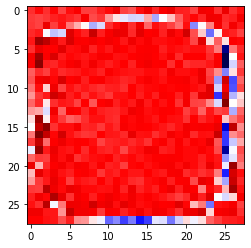

In [83]:
plt.imshow(model_W[:,3].reshape(28,28), cmap="seismic")
#plasma_r

In [84]:

for i in range(10):
    data = model_W[:,i].reshape(28,28)
    cmap = plt.cm.jet
    norm = plt.Normalize(vmin=data.min(), vmax=data.max())
    image = cmap(norm(data))
    image_name = 'images/' + str(i)+'.png'
    plt.imsave(image_name, data, cmap='seismic')
    

<function matplotlib.pyplot.show(*args, **kw)>

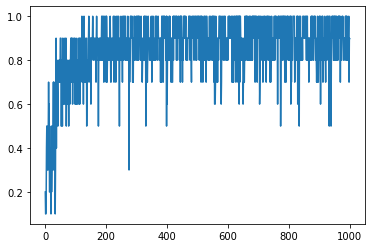

In [4]:
a = np.array([0, 0, 1, 1, 1])
b = np.array([-1, 2, -1])

In [6]:
np.matmul(a,b)

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 3 is different from 5)